## Feature engineering

In [17]:
import pandas as pd
import numpy as np

wine_df = pd.read_csv('data/wine_cleared.zip')
wine_df.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


### Analysis of numerical values

In [18]:
wine_df['price_round'] = wine_df['price'].round().astype(int)
wine_df.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14


### Analysis of text values

In [19]:
import re

regex = '\d{4}' # регулярное выражение для нахождения чисел
wine_df['year'] = wine_df['title'].str.findall(regex).str.get(0)

wine_df['year'] 

0         2013
1         2011
2         2013
3         2013
4         2012
          ... 
129966    2013
129967    2004
129968    2013
129969    2012
129970    2012
Name: year, Length: 129971, dtype: object

### Category analysis

In [20]:
wine_df['is_usa'] = wine_df['country'].apply(lambda x: 1 if x == 'US' else 0 )

wine_df['is_usa']

0         0
1         0
2         1
3         1
4         1
         ..
129966    0
129967    1
129968    0
129969    0
129970    0
Name: is_usa, Length: 129971, dtype: int64

### TASK 2.1

In [21]:
wine_df['country'].value_counts().head(3)

US        54504
France    22093
Italy     19540
Name: country, dtype: int64

### TASK 2.2

In [22]:
wine_df['is_france'] = wine_df['country'].apply(lambda x: 1 if x == 'France' else 0)
wine_df['is_italy'] = wine_df['country'].apply(lambda x: 1 if x == 'Italy' else 0)

wine_df.head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa,is_france,is_italy
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013,0,0,1
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011,0,0,0


In [23]:
sum1 = wine_df['is_france'].sum()
sum2 = wine_df['is_italy'].sum()

print(sum1)
print(sum2)

22093
19540


### TASK 2.3

In [24]:
# https://stackoverflow.com/questions/60553469/pandas-coerce-errors-while-reading-csv

# преобразуем признак year в объект datetime для удобного сравнения
wine_df['year'] = pd.to_datetime(wine_df['year'], errors='coerce')

# для сравнения используем год, заполняем значение признака old_wine, где год меньше 2010
wine_df['old_wine'] = wine_df['year'].apply(lambda x: 1 if x.year < 2010 else 0) 

wine_df['old_wine'].sum()

39765

### TASK 2.7

In [25]:
regex = '\((.*?)\)'
wine_df['locality'] = wine_df['title'].str.findall(regex).str.get(0)

wine_df['locality']

0                           Etna
1                          Douro
2              Willamette Valley
3            Lake Michigan Shore
4              Willamette Valley
                   ...          
129966    Erben Müller-Burggraef
129967                    Oregon
129968                    Alsace
129969                    Alsace
129970                    Alsace
Name: locality, Length: 129971, dtype: object

### External data sources

In [26]:
import pandas as pd
country_population = pd.read_csv('data/country_population.csv', sep=';')

country_population

,country,population
0,China,"1,411,778,724"
1,India,"1,386,584,581"
2,US,"333,022,386"
3,Indonesia,"271,350,000"
4,Pakistan,"225,200,000"
...,...,...
236,Niue,"1,549"
237,Tokelau,"1,501"
238,Vatican City,825
239,Cocos Islands,573


### TASK 3.1

In [27]:
country_population.loc[country_population['country'] == 'Italy']

,country,population
24,Italy,"59,097,904"


### Work with files

In [31]:
wine_df = wine_df.join(
    country_population.set_index('country'),
    on='country'
)

display(wine_df.head(3))

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,White Blend,Nicosia,35,2013-01-01,0,0,1,0,Etna,"59,097,904"
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,Portuguese Red,Quinta dos Avidagos,15,2011-01-01,0,0,0,0,Douro,"10,347,892"
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,Pinot Gris,Rainstorm,14,2013-01-01,1,0,0,0,Willamette Valley,"333,022,386"


In [32]:
country_area = pd.read_csv('data/country_area.csv', sep=';')
country_area

,country,area
0,Russia,17075400.00
1,Canada,9984670.00
2,China,9596960.00
3,US,9372610.00
4,Brazil,8547000.00
...,...,...
188,San Marino,61.00
189,Tuvalu,26.00
190,Nauru,21.00
191,Monaco,2.00


### TASK 3.2

In [33]:
wine_df = wine_df.join(
    country_area.set_index('country'),
    on='country'
)

display(wine_df.head(3))

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population,area
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,Nicosia,35,2013-01-01,0,0,1,0,Etna,"59,097,904",301230.0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,Quinta dos Avidagos,15,2011-01-01,0,0,0,0,Douro,"10,347,892",92391.0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,Rainstorm,14,2013-01-01,1,0,0,0,Willamette Valley,"333,022,386",9372610.0


In [34]:
wine_df.loc[wine_df['title'] == 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))']['area']

94    9372610.0
Name: area, dtype: float64

### Work with datetime

In [35]:
import pandas as pd 

# инициализируем информацию о звонках
calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]

calls = pd.DataFrame(calls_list, columns = ['client_id',  'agent_date', 'created_at' ,'end_date'])

# преобразовываем признаки в формат datetime для удобной работы

calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])

calls

,client_id,agent_date,created_at,end_date
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32


In [36]:
calls['duration'] = (calls['end_date'] - calls['created_at']).dt.seconds
calls

,client_id,agent_date,created_at,end_date,duration
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6


### TASK 4.1

In [37]:
calls['time_connection'] = (calls['created_at'] - calls['agent_date']).dt.seconds
calls['time_connection'].sum()

89

### TASK 4.2

In [38]:
calls['is_connection'] = calls['duration'].apply(lambda x: 1 if x >= 10 else 0)
calls['is_connection'].sum()

7

### TASK 4.3

In [39]:
calls['time_diff'] = (calls['end_date'] - calls['agent_date']).dt.seconds
calls['time_diff'].sum()

1144

In [40]:
calls.head(5)

,client_id,agent_date,created_at,end_date,duration,time_connection,is_connection,time_diff
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1,5,0,6
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231,2,1,233
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104,0,1,104
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2,7,0,9
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215,1,1,216


In [41]:
calls = calls.drop(columns=['agent_date','created_at','end_date'], axis=1)
calls

,client_id,duration,time_connection,is_connection,time_diff
0,460,1,5,0,6
1,12,231,2,1,233
2,56,104,0,1,104
3,980,2,7,0,9
4,396,215,1,1,216
5,449,95,5,1,100
6,397,92,2,1,94
7,398,215,0,1,215
8,452,94,1,1,95
9,440,6,66,0,72


### TASK 4.5

In [42]:
date_now = '2022-01-12'
date_now = pd.to_datetime(date_now)
wine_df['years_diff'] = date_now - wine_df['year']
wine_df['years_diff'].max()

Timedelta('98627 days 00:00:00')

## Feature coding

In [43]:
import category_encoders as ce

In [44]:
import pandas as pd

clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing

,size,type
0,xxs,dress
1,xxs,skirt
2,xs,dress
3,s,skirt
4,m,dress
5,l,shirt
6,s,coat
7,m,coat
8,xxl,shirt
9,l,dress


### Ordinal encoding

In [45]:
import category_encoders as ce

ord_encodern = ce.OrdinalEncoder()
data_bin = ord_encodern.fit_transform(clothing[['size','type']])
clothing = pd.concat([clothing, data_bin], axis=1)

clothing

,size,type,size,type
0,xxs,dress,1,1
1,xxs,skirt,1,2
2,xs,dress,2,1
3,s,skirt,3,2
4,m,dress,4,1
5,l,shirt,5,3
6,s,coat,3,4
7,m,coat,4,4
8,xxl,shirt,6,3
9,l,dress,5,1


### TASK 5.2

In [46]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129972 entries, 0 to 129970
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype          
---  ------                 --------------   -----          
 0   Unnamed: 0             129972 non-null  int64          
 1   country                129909 non-null  object         
 2   description            129972 non-null  object         
 3   designation            129972 non-null  object         
 4   points                 129972 non-null  int64          
 5   price                  129972 non-null  float64        
 6   province               129909 non-null  object         
 7   region_1               129972 non-null  object         
 8   taster_name            129972 non-null  object         
 9   taster_twitter_handle  129972 non-null  object         
 10  title                  129972 non-null  object         
 11  variety                129971 non-null  object         
 12  winery                 129972 

### TASK 5.2

In [47]:
import category_encoders as ce

ord_encoder = ce.OrdinalEncoder(cols=['year'])
year_col = ord_encoder.fit_transform(wine_df['year'])
year_col

,year
0,1
1,2
2,1
3,1
4,3
...,...
129966,1
129967,12
129968,1
129969,3


### One-hot encoding

In [48]:
clothing_list2 = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing2 = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing2

,size,type
0,xxs,dress
1,xxs,skirt
2,xs,dress
3,s,skirt
4,m,dress
5,l,shirt
6,s,coat
7,m,coat
8,xxl,shirt
9,l,dress


In [49]:
import category_encoders as ce # импорт для работы с кодировщиком

encoder = ce.OneHotEncoder(cols=['type'])  # указываем столбец, иначе будут закодированы все строковые столбцы
type_bin = encoder.fit_transform(clothing2[['type']])
clothing3 = pd.concat([clothing2, type_bin], axis=1)

clothing3

,size,type,type_1,type_2,type_3,type_4
0,xxs,dress,1,0,0,0
1,xxs,skirt,0,1,0,0
2,xs,dress,1,0,0,0
3,s,skirt,0,1,0,0
4,m,dress,1,0,0,0
5,l,shirt,0,0,1,0
6,s,coat,0,0,0,1
7,m,coat,0,0,0,1
8,xxl,shirt,0,0,1,0
9,l,dress,1,0,0,0


In [50]:
clothing_list4 = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing4 = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing4

,size,type
0,xxs,dress
1,xxs,skirt
2,xs,dress
3,s,skirt
4,m,dress
5,l,shirt
6,s,coat
7,m,coat
8,xxl,shirt
9,l,dress


In [51]:
import pandas as pd

clothing_dummies = pd.get_dummies(clothing4, columns=['type'])
clothing_dummies

,size,type_coat,type_dress,type_shirt,type_skirt
0,xxs,0,1,0,0
1,xxs,0,0,0,1
2,xs,0,1,0,0
3,s,0,0,0,1
4,m,0,1,0,0
5,l,0,0,1,0
6,s,1,0,0,0
7,m,1,0,0,0
8,xxl,0,0,1,0
9,l,0,1,0,0


### TASK 5.4

In [52]:
import category_encoders as ce

taster_dummies = pd.get_dummies(wine_df, columns=['taster_name'])
taster_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129972 entries, 0 to 129970
Data columns (total 42 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   Unnamed: 0                      129972 non-null  int64          
 1   country                         129909 non-null  object         
 2   description                     129972 non-null  object         
 3   designation                     129972 non-null  object         
 4   points                          129972 non-null  int64          
 5   price                           129972 non-null  float64        
 6   province                        129909 non-null  object         
 7   region_1                        129972 non-null  object         
 8   taster_twitter_handle           129972 non-null  object         
 9   title                           129972 non-null  object         
 10  variety                         129971 non-n

### Binary encoding

In [53]:
clothing_list5 = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing5 = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing5

,size,type
0,xxs,dress
1,xxs,skirt
2,xs,dress
3,s,skirt
4,m,dress
5,l,shirt
6,s,coat
7,m,coat
8,xxl,shirt
9,l,dress


In [54]:
import category_encoders as ce
bin_encoder = ce.BinaryEncoder(cols=['type'])
type_bin = bin_encoder.fit_transform(clothing5['type'])
clothing5 = pd.concat([clothing5, type_bin], axis=1)

clothing5

,size,type,type_0,type_1,type_2
0,xxs,dress,0,0,1
1,xxs,skirt,0,1,0
2,xs,dress,0,0,1
3,s,skirt,0,1,0
4,m,dress,0,0,1
5,l,shirt,0,1,1
6,s,coat,1,0,0
7,m,coat,1,0,0
8,xxl,shirt,0,1,1
9,l,dress,0,0,1


### TASK 5.5

In [55]:
import category_encoders as ce

bin_encoder = ce.BinaryEncoder(['country'])
type_bin = bin_encoder.fit_transform(wine_df['country'])
wine_df = pd.concat([wine_df, type_bin], axis=1)

display(type_bin)

,country_0,country_1,country_2,country_3,country_4,country_5
0,0,0,0,0,0,1
1,0,0,0,0,1,0
2,0,0,0,0,1,1
3,0,0,0,0,1,1
4,0,0,0,0,1,1
...,...,...,...,...,...,...
129966,0,0,0,1,1,0
129967,0,0,0,0,1,1
129968,0,0,0,1,0,1
129969,0,0,0,1,0,1


### TASK 5.8

In [56]:
wine_df['taster_twitter_handle'].value_counts()

unknown             31213
@vossroger          25514
@wineschach         15134
@kerinokeefe        10776
@vboone              9537
@paulgwine           9532
@mattkettmann        6332
@JoeCz               5147
@wawinereport        4966
@gordone_cellars     4177
@AnneInVino          3685
@laurbuzz            1835
@suskostrzewa        1085
@worldwineguys       1006
@bkfiona               27
@winewchristina         6
Name: taster_twitter_handle, dtype: int64

In [57]:
import category_encoders as ce

encoder = ce.BinaryEncoder()
type_bin = encoder.fit_transform(wine_df['taster_twitter_handle'])
wine_df = pd.concat([wine_df, type_bin], axis=1)

type_bin

,taster_twitter_handle_0,taster_twitter_handle_1,taster_twitter_handle_2,taster_twitter_handle_3,taster_twitter_handle_4
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,0,1,1
3,0,0,1,0,0
4,0,0,0,1,1
...,...,...,...,...,...
129966,0,0,1,0,0
129967,0,0,0,1,1
129968,0,0,0,1,0
129969,0,0,0,1,0


### TASK 5.9

In [58]:
list_of_dicts = [
 {'product': 'Product1', 'price': 1200, 'payment_type': 'Mastercard'},
 {'product': 'Product2', 'price': 3600, 'payment_type': 'Visa'},
 {'product': 'Product3', 'price': 7500, 'payment_type': 'Amex'}
]
df = pd.DataFrame(list_of_dicts)

df

,product,price,payment_type
0,Product1,1200,Mastercard
1,Product2,3600,Visa
2,Product3,7500,Amex


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product       3 non-null      object
 1   price         3 non-null      int64 
 2   payment_type  3 non-null      object
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes


In [60]:
import category_encoders as ce

encoder = ce.OneHotEncoder(['product','payment_type'])
type_bin = encoder.fit_transform(df[['product','payment_type']])
df = pd.concat([df,type_bin], axis=1)
df

,product,price,payment_type,product_1,product_2,product_3,payment_type_1,payment_type_2,payment_type_3
0,Product1,1200,Mastercard,1,0,0,1,0,0
1,Product2,3600,Visa,0,1,0,0,1,0
2,Product3,7500,Amex,0,0,1,0,0,1


## Normalization & standardization

### Normalization

In [10]:
import numpy as np
import pandas as pd

np.random.seed(34)

# для нормализации, стандартизации
from sklearn import preprocessing

# для графиков 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

# сгенерируем датасет из случайных чисел
df = pd.DataFrame({
    # бета распределение, 5 - значение альфа, 1- значение бета, 1000 - размер
    'beta': np.random.beta(5, 1, 1000) * 60,
    
    # экспоненциальное распределение, 10 - резкость экспоненты, 1000 размер
    'exponential': np.random.exponential(10, 1000),
    
    # нормальное распределение, 10 - среднее значение p., 2 - стандартное отклонение, 1000 - кол-во сэмплов
    'normal_p': np.random.normal(10, 2, 1000),
    
    # нормальное распределение, 10 - среднее значение l., 2 - стандартное отклонение, 1000 - кол-во сэмплов
    'normal_l': np.random.normal(10, 10, 1000),
})

# копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df.columns)

df

,beta,exponential,normal_p,normal_l
0,39.273740,2.263890,11.860245,4.748207
1,55.030395,13.108592,11.796582,10.959172
2,47.434682,3.312019,11.146945,3.919227
3,43.173536,17.664301,8.266689,42.072915
4,45.681443,2.109760,5.112983,16.960664
...,...,...,...,...
995,50.976583,3.748883,7.057497,9.609427
996,46.290172,1.195512,8.419497,14.972852
997,58.912029,7.014868,11.541732,33.654934
998,52.185621,2.391140,11.819914,6.091417


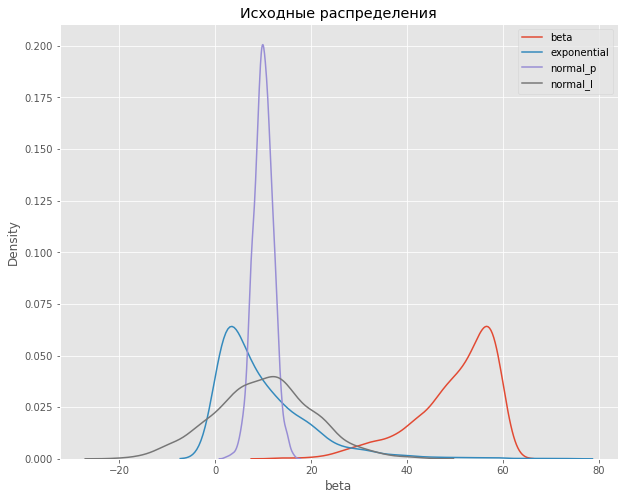

In [16]:
# зададим параметры холста, название и визуализируем кривые распределения
fig, (ax1) = plt.subplots(ncols=1, figsize=(10,8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE - оценка плотности ядра) - специальный метод для графиков распределений
sns.kdeplot(df['beta'], ax=ax1, label ='beta')
sns.kdeplot(df['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df['normal_l'], ax=ax1, label ='normal_l')
plt.legend()

In [17]:
df.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.024249,10.028387,9.994006,10.175745
std,8.474545,9.733928,2.013971,10.104004
min,13.854022,0.007617,2.356844,-19.539980
25%,45.793283,2.951421,8.687478,3.566822
50%,52.337504,7.018565,9.983498,10.326331
75%,56.722191,14.022485,11.306914,16.615057
max,59.990640,71.344341,16.214364,42.072915


### MinMaxScaler

<AxesSubplot:title={'center':'После нормализации MinMaxScaler'}, xlabel='beta', ylabel='Density'>

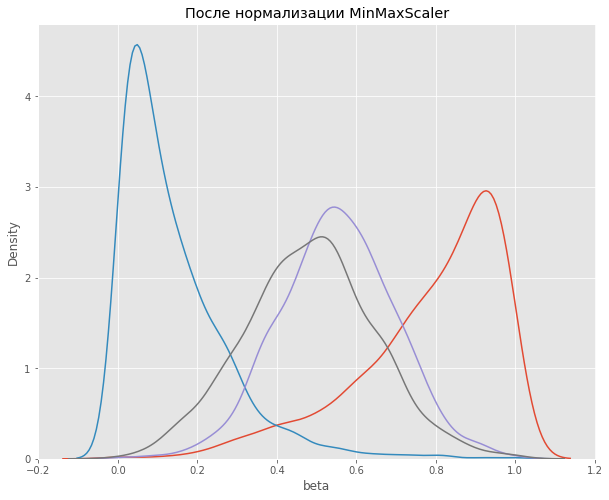

In [21]:
### инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# копируем исходный датасет
df_mm = mm_scaler.fit_transform(df)

# преобразуем промежуточный датасет в датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=col_names)

# строим графики
fig, (ax1) = plt.subplots(ncols=1, figsize=(10,8))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1)

In [22]:
df_mm.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.783981,0.140471,0.551120,0.482297
std,0.183684,0.136450,0.145334,0.163992
min,0.000000,0.000000,0.000000,0.000000
25%,0.692276,0.041266,0.456837,0.375032
50%,0.834120,0.098280,0.550362,0.484741
75%,0.929157,0.196461,0.645864,0.586810
max,1.000000,1.000000,1.000000,1.000000


### Robustscaler

<AxesSubplot:title={'center':'Распределения после RobustScaler'}, xlabel='beta', ylabel='Density'>

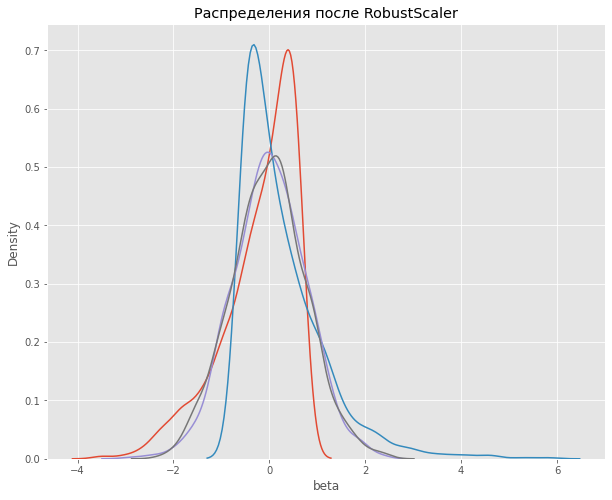

In [24]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# копируем исходный датасет
df_r = r_scaler.fit_transform(df)

# преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax1)
sns.kdeplot(df_r['exponential'], ax=ax1)
sns.kdeplot(df_r['normal_p'], ax=ax1)
sns.kdeplot(df_r['normal_l'], ax=ax1)

In [25]:
df_r.describe()

,beta,exponential,normal_p,normal_l
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,-2.116639e-01,2.718638e-01,4.011529e-03,-0.011541
std,7.754247e-01,8.792225e-01,7.688570e-01,0.774358
min,-3.521256e+00,-6.332678e-01,-2.911564e+00,-2.288916
25%,-5.987992e-01,-3.673671e-01,-4.947706e-01,-0.518040
50%,3.252607e-16,-4.011548e-17,3.390842e-16,0.000000
75%,4.012008e-01,6.326329e-01,5.052294e-01,0.481960
max,7.002654e-01,5.810261e+00,2.378706e+00,2.433017


### Standardization

### Standardscaler

<AxesSubplot:title={'center':'Распределение после StandardScaler'}, xlabel='beta', ylabel='Density'>

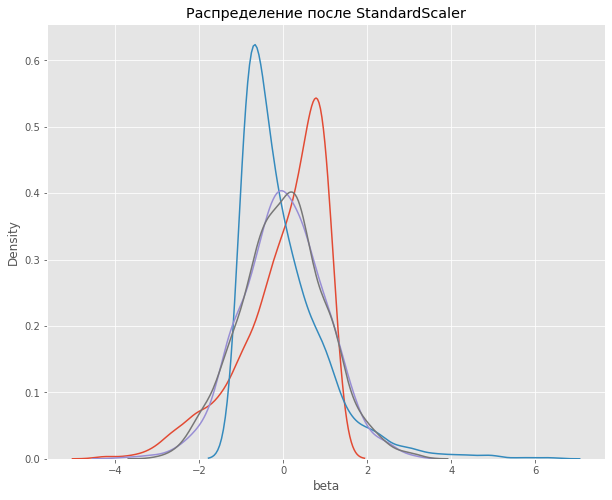

In [30]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()\
    
# копируем исходный датасет
df_s = s_scaler.fit_transform(df)

# преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(df_s, columns=col_names)

# строим графики
fig, (ax1) = plt.subplots(ncols=1, figsize=(10,8))
ax1.set_title('Распределение после StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax1)
sns.kdeplot(df_s['exponential'], ax=ax1)
sns.kdeplot(df_s['normal_p'], ax=ax1)
sns.kdeplot(df_s['normal_l'], ax=ax1)

In [31]:
df_s.describe()

,beta,exponential,normal_p,normal_l
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,6.075140e-16,-1.776357e-18,8.100187e-16,-2.398082e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-4.270238e+00,-1.029983e+00,-3.793988e+00,-2.942457e+00
25%,-4.995057e-01,-7.274049e-01,-6.490566e-01,-6.544169e-01
50%,2.731017e-01,-3.093641e-01,-5.220134e-03,1.491105e-02
75%,7.907555e-01,4.105327e-01,6.522262e-01,6.376219e-01
max,1.176627e+00,6.302351e+00,3.090149e+00,3.158464e+00
